# COMPSCI 389: Introduction to Machine Learning
# Data Processing Example

The code below runs gradient descent to minimize the sample mean squared error when using a linear parametric model, with the second-degree (order) polynomial basis.

#### Unlike before (notebook 15), this code applies the standardization preprocessing step to rescale the features.

The first code block defines the various functions for this. I recommend skipping down to the next markdown block.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split

####################################################################
### NOTE: Below we added StandardScaler
####################################################################
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Function to calculate mean squared error (for evaluation)
def mean_squared_error(predictions, labels):
    return np.mean((predictions - labels) ** 2)

# Function to calculate gradients
def compute_gradients(X, y, weights):
    predictions = X.dot(weights)
    errors = predictions - y
    return 2 / X.shape[0] * X.T.dot(errors)

class PolynomialRegressionGD(BaseEstimator):
    def __init__(self, learning_rate, iterations=1000, polynomial_degree=2):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.polynomial_degree = polynomial_degree

    def fit(self, X, y):
        ####################################################################
        ### NOTE: The lines below are new - they apply standardization
        ####################################################################
        # Standardize features and store the scaler
        self.scaler_ = StandardScaler().fit(X)
        X_scaled = self.scaler_.transform(X)
        
        # Expand features into polynomial basis and store the transformer
        self.poly = PolynomialFeatures(degree=self.polynomial_degree)
        X_poly = self.poly.fit_transform(X_scaled)  # Use standardized features

        # Get the number of features
        numFeatures = X_poly.shape[1]

        # Initialize weights and loss history
        self.weights = np.zeros(numFeatures)
        self.loss_history = []

        # Print the initial loss
        predictions = X_poly.dot(self.weights)
        loss = mean_squared_error(predictions, y)
        print(f"Iteration 0/{self.iterations}, Loss: {loss:.4f}")

        for i in range(1, self.iterations + 1):
            # Compute the gradient of the loss function
            gradients = compute_gradients(X_poly, y, self.weights)

            # Update the weights using gradient descent
            self.weights -= self.learning_rate * gradients

            # Compute, print, and store the resulting loss
            loss = mean_squared_error(X_poly.dot(self.weights), y)
            self.loss_history.append(loss)
            print(f"Iteration {i}/{self.iterations}, Loss: {loss:.4f}")

        return self

    def predict(self, X):
        ####################################################################
        ### NOTE: The line below is new - it applies standardization.
        ### NOTE: We don't call "fit" again! We want to use the same 
        ###       transformation used during training.
        ####################################################################
        # Standardize the input features using the stored scaler
        X_scaled = self.scaler_.transform(X)
        # Transform standardized features into the polynomial basis
        X_poly = self.poly.transform(X_scaled)
        return X_poly.dot(self.weights)

# Load the data set
df = pd.read_csv("data/GPA.csv", delimiter=',')

# Split the data into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)

def run(alpha):
    iterations = 1000
    polynomial_degree = 2

    # Initialize and fit the model
    model = PolynomialRegressionGD(
        learning_rate=alpha,
        iterations=iterations,
        polynomial_degree=polynomial_degree
    )
    model.fit(X_train, y_train)

    # Plotting the loss over iterations
    plt.plot(range(1, iterations + 1), model.loss_history)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.yscale('log')
    plt.title(f'Gradient Descent Loss, Polynomial Degree: {polynomial_degree}')
    plt.show()

    # Predict on the test set
    predictions = model.predict(X_test)

    # Calculate MSE on the test set
    mse_test = mean_squared_error(predictions, y_test)
    print(f"Test MSE: {mse_test:.4f}")

    # Calculate the standard error of the MSE
    squared_errors = (predictions - y_test) ** 2
    std_error = np.std(squared_errors) / np.sqrt(len(squared_errors))
    print(f"Standard Error of MSE: {std_error:.4f}")


The `run` function takes the step size (learning rate) `alpha` as its one argument. It then runs 1,000 iterations of gradient descent on the GPA data set using the second-degree polynomial basis. Let's recreate the plot from the last lecture!

Try to find a value for `alpha` that is effective, starting with 0.1. Remember, running the code may result in errors when the loss because `inf` or `nan`.

Iteration 0/1000, Loss: 8.4534
Iteration 1/1000, Loss: 147.5583
Iteration 2/1000, Loss: 5331.8391
Iteration 3/1000, Loss: 195359.9667
Iteration 4/1000, Loss: 7160187.5536
Iteration 5/1000, Loss: 262431763.8393
Iteration 6/1000, Loss: 9618525052.3864
Iteration 7/1000, Loss: 352533638708.9949
Iteration 8/1000, Loss: 12920896474210.9355
Iteration 9/1000, Loss: 473570596863278.8750
Iteration 10/1000, Loss: 17357085915910218.0000
Iteration 11/1000, Loss: 636163717696490496.0000
Iteration 12/1000, Loss: 23316372210985693184.0000
Iteration 13/1000, Loss: 854580665256674197504.0000
Iteration 14/1000, Loss: 31321687045570891350016.0000
Iteration 15/1000, Loss: 1147987684797460942684160.0000
Iteration 16/1000, Loss: 42075502591198757006606336.0000
Iteration 17/1000, Loss: 1542131454671759051960877056.0000
Iteration 18/1000, Loss: 56521473946350318250272751616.0000
Iteration 19/1000, Loss: 2071598375994438236507067121664.0000
Iteration 20/1000, Loss: 75927245554428887294718605524992.0000
Iteratio

c:\Users\pthomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Iteration 359/1000, Loss: inf
Iteration 360/1000, Loss: inf
Iteration 361/1000, Loss: inf
Iteration 362/1000, Loss: inf
Iteration 363/1000, Loss: inf
Iteration 364/1000, Loss: inf
Iteration 365/1000, Loss: inf
Iteration 366/1000, Loss: inf
Iteration 367/1000, Loss: inf
Iteration 368/1000, Loss: inf
Iteration 369/1000, Loss: inf
Iteration 370/1000, Loss: inf
Iteration 371/1000, Loss: inf
Iteration 372/1000, Loss: inf
Iteration 373/1000, Loss: inf
Iteration 374/1000, Loss: inf
Iteration 375/1000, Loss: inf
Iteration 376/1000, Loss: inf
Iteration 377/1000, Loss: inf
Iteration 378/1000, Loss: inf
Iteration 379/1000, Loss: inf
Iteration 380/1000, Loss: inf
Iteration 381/1000, Loss: inf
Iteration 382/1000, Loss: inf
Iteration 383/1000, Loss: inf
Iteration 384/1000, Loss: inf
Iteration 385/1000, Loss: inf
Iteration 386/1000, Loss: inf
Iteration 387/1000, Loss: inf
Iteration 388/1000, Loss: inf
Iteration 389/1000, Loss: inf
Iteration 390/1000, Loss: nan
Iteration 391/1000, Loss: nan
Iteration 

C:\Users\pthomas\AppData\Local\Temp\ipykernel_17324\2087762327.py:57: RuntimeWarning: invalid value encountered in subtract
  self.weights -= self.learning_rate * gradients


Iteration 525/1000, Loss: nan
Iteration 526/1000, Loss: nan
Iteration 527/1000, Loss: nan
Iteration 528/1000, Loss: nan
Iteration 529/1000, Loss: nan
Iteration 530/1000, Loss: nan
Iteration 531/1000, Loss: nan
Iteration 532/1000, Loss: nan
Iteration 533/1000, Loss: nan
Iteration 534/1000, Loss: nan
Iteration 535/1000, Loss: nan
Iteration 536/1000, Loss: nan
Iteration 537/1000, Loss: nan
Iteration 538/1000, Loss: nan
Iteration 539/1000, Loss: nan
Iteration 540/1000, Loss: nan
Iteration 541/1000, Loss: nan
Iteration 542/1000, Loss: nan
Iteration 543/1000, Loss: nan
Iteration 544/1000, Loss: nan
Iteration 545/1000, Loss: nan
Iteration 546/1000, Loss: nan
Iteration 547/1000, Loss: nan
Iteration 548/1000, Loss: nan
Iteration 549/1000, Loss: nan
Iteration 550/1000, Loss: nan
Iteration 551/1000, Loss: nan
Iteration 552/1000, Loss: nan
Iteration 553/1000, Loss: nan
Iteration 554/1000, Loss: nan
Iteration 555/1000, Loss: nan
Iteration 556/1000, Loss: nan
Iteration 557/1000, Loss: nan
Iteration 

c:\Users\pthomas\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


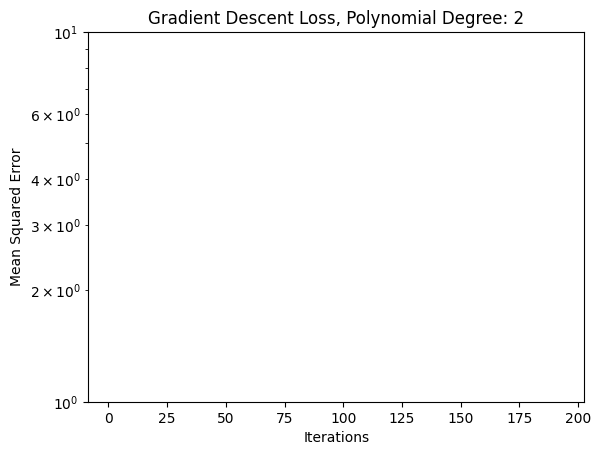

Test MSE: nan
Standard Error of MSE: nan


In [2]:
# Set the learning rate and run the model
alpha = 0.1
run(alpha)